In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert job_skill column from string to clean list of skills
df['job_skills'] = df['job_skills'].apply(
    lambda x: [skill.strip().strip("[]()'\"") for skill in x.split(',')] if pd.notnull(x) else []
)
df

c:\Users\HP\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,[],None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df.info()
# 3. Explode the 'job_skill' column so each skill gets its own row
df_exploded = df.explode('job_skills')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

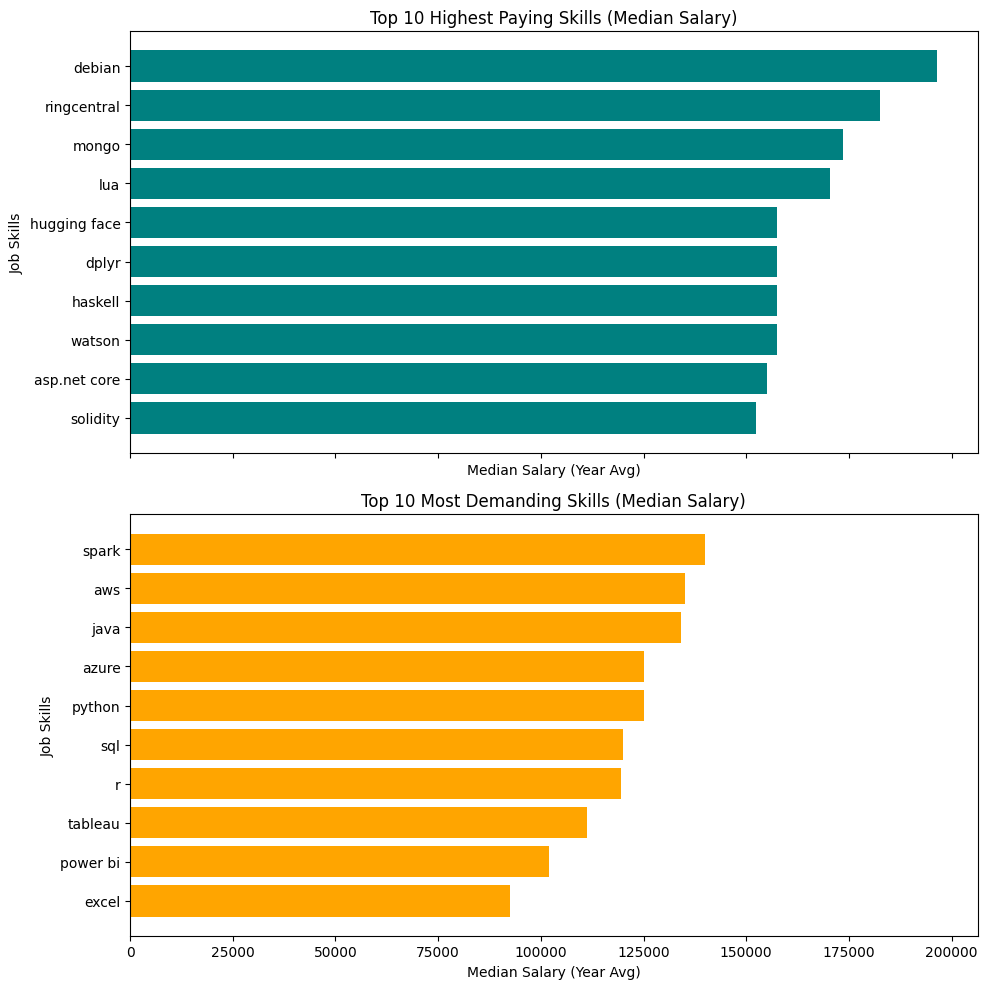

In [15]:
import matplotlib.pyplot as plt

# Calculate median salary for each skill (excluding NaN salaries)
skill_salary = (
    df_exploded[df_exploded['salary_year_avg'].notna()]
    .groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

# Calculate median salary for the top 10 most demanding skills (by count)
top_skills = (
    df_exploded['job_skills']
    .value_counts()
    .head(10)
    .index
)
demand_salary = (
    df_exploded[df_exploded['job_skills'].isin(top_skills)]
    .groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
)

# Set up subplots with shared x-axis for easier comparison
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# 1st subplot: Barh for top 10 highest paying skills
axs[0].barh(skill_salary.index[::-1], skill_salary.values[::-1], color='teal')
axs[0].set_title('Top 10 Highest Paying Skills (Median Salary)')
axs[0].set_xlabel('Median Salary (Year Avg)')
axs[0].set_ylabel('Job Skills')

# 2nd subplot: Barh for salaries of top 10 most demanding skills
axs[1].barh(demand_salary.index[::-1], demand_salary.values[::-1], color='orange')
axs[1].set_title('Top 10 Most Demanding Skills (Median Salary)')
axs[1].set_xlabel('Median Salary (Year Avg)')
axs[1].set_ylabel('Job Skills')

plt.tight_layout()
plt.show()


In [10]:
usa_analyst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        0 non-null      object        
 1   job_title              0 non-null      object        
 2   job_location           0 non-null      object        
 3   job_via                0 non-null      object        
 4   job_schedule_type      0 non-null      object        
 5   job_work_from_home     0 non-null      bool          
 6   search_location        0 non-null      object        
 7   job_posted_date        0 non-null      datetime64[ns]
 8   job_no_degree_mention  0 non-null      bool          
 9   job_health_insurance   0 non-null      bool          
 10  job_country            0 non-null      object        
 11  salary_rate            0 non-null      object        
 12  salary_year_avg        0 non-null      float64       
 13  salary_hour_avg       

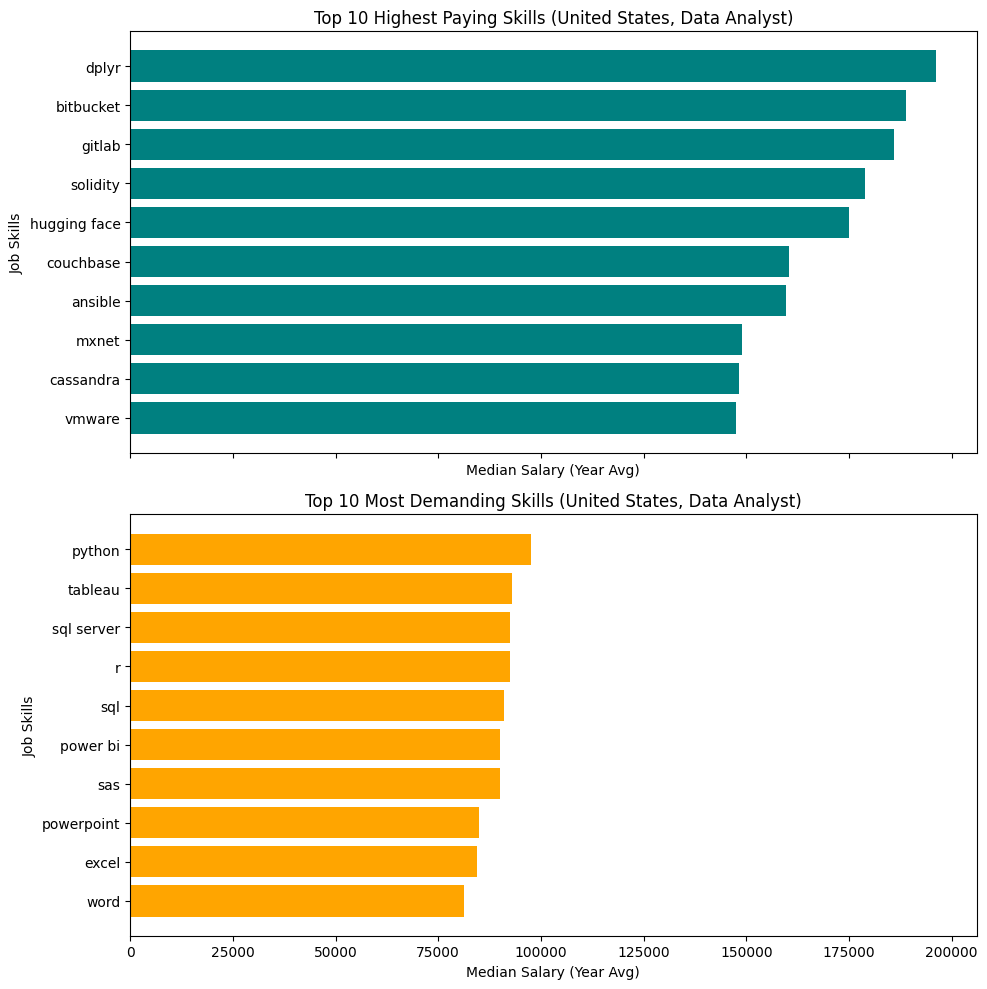

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# 1. Load your data
#df = pd.read_excel(r'C:\Users\HP\Downloads\your_data_file.xlsx')

# 2. Convert 'job_skill' column from string to list
#df['job_skill'] = df['job_skill'].apply(lambda x: [skill.strip() for skill in x.split(',')] if pd.notnull(x) else [])

# 3. Explode the 'job_skill' column
#df_exploded = df.explode('job_skill')

# 4. Filter for United States, Data Analyst, and drop NaN salary values
usa_analyst = df_exploded[
    (df_exploded['job_country'].str.lower() == 'united states') &
    (df_exploded['job_title_short'].str.lower() == 'data analyst') &
    (df_exploded['salary_year_avg'].notna())
]

# 5. Top 10 highest paying skills (median salary), sorted descending
top_salary_skills = (
    usa_analyst.groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

# 6. Top 10 most demanding skills (by count)
top_demand_skills = (
    usa_analyst['job_skills']
    .value_counts()
    .head(10)
    .index
)

# 7. For these most demanding skills, get their median salaries and sort descending
demand_salary = (
    usa_analyst[usa_analyst['job_skills'].isin(top_demand_skills)]
    .groupby('job_skills')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
)

# 8. Plot with shared x-axis for comparison, highest salary at the top in both
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Top subplot: Highest paying skills
axs[0].barh(top_salary_skills.index[::-1], top_salary_skills.values[::-1], color='teal')
axs[0].set_title('Top 10 Highest Paying Skills (United States, Data Analyst)')
axs[0].set_xlabel('Median Salary (Year Avg)')
axs[0].set_ylabel('Job Skills')

# Bottom subplot: Most demanding skills, sorted by median salary descending
axs[1].barh(demand_salary.index[::-1], demand_salary.values[::-1], color='orange')
axs[1].set_title('Top 10 Most Demanding Skills (United States, Data Analyst)')
axs[1].set_xlabel('Median Salary (Year Avg)')
axs[1].set_ylabel('Job Skills')

plt.tight_layout()
plt.show()

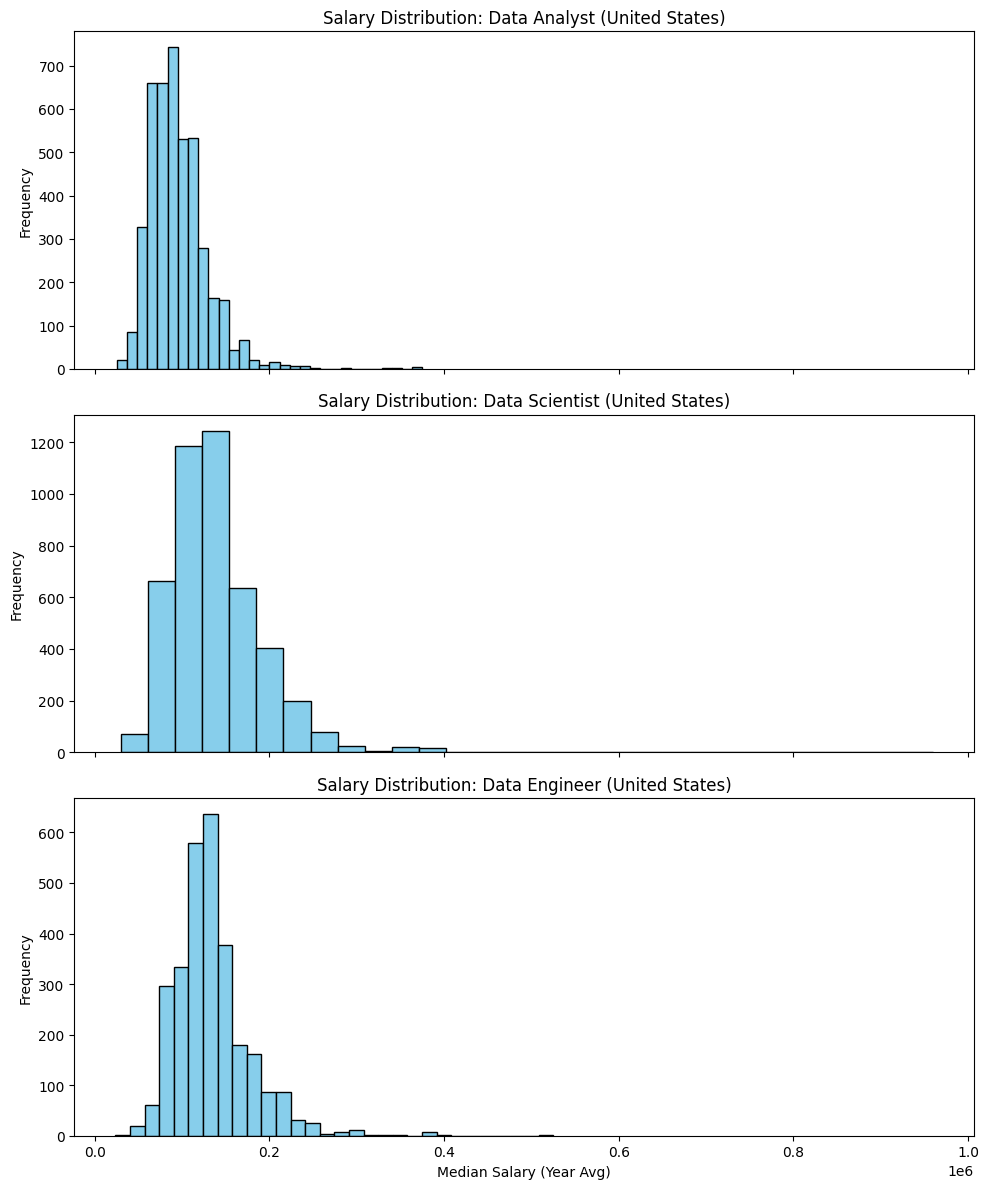

In [7]:
import matplotlib.pyplot as plt

# Filter for United States and relevant job titles, drop NaN salaries
us_df = df[
    (df['job_country'].str.lower() == 'united states') &
    (df['job_title_short'].str.lower().isin(['data analyst', 'data scientist', 'data engineer'])) &
    (df['salary_year_avg'].notna())
]

# Prepare data for each job title
titles = ['data analyst', 'data scientist', 'data engineer']
salary_data = [us_df[us_df['job_title_short'].str.lower() == title]['salary_year_avg'] for title in titles]

# Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i, ax in enumerate(axs):
    ax.hist(salary_data[i], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Salary Distribution: {titles[i].title()} (United States)')
    ax.set_ylabel('Frequency')
    if i == 2:
        ax.set_xlabel('Median Salary (Year Avg)')

plt.tight_layout()
plt.show()

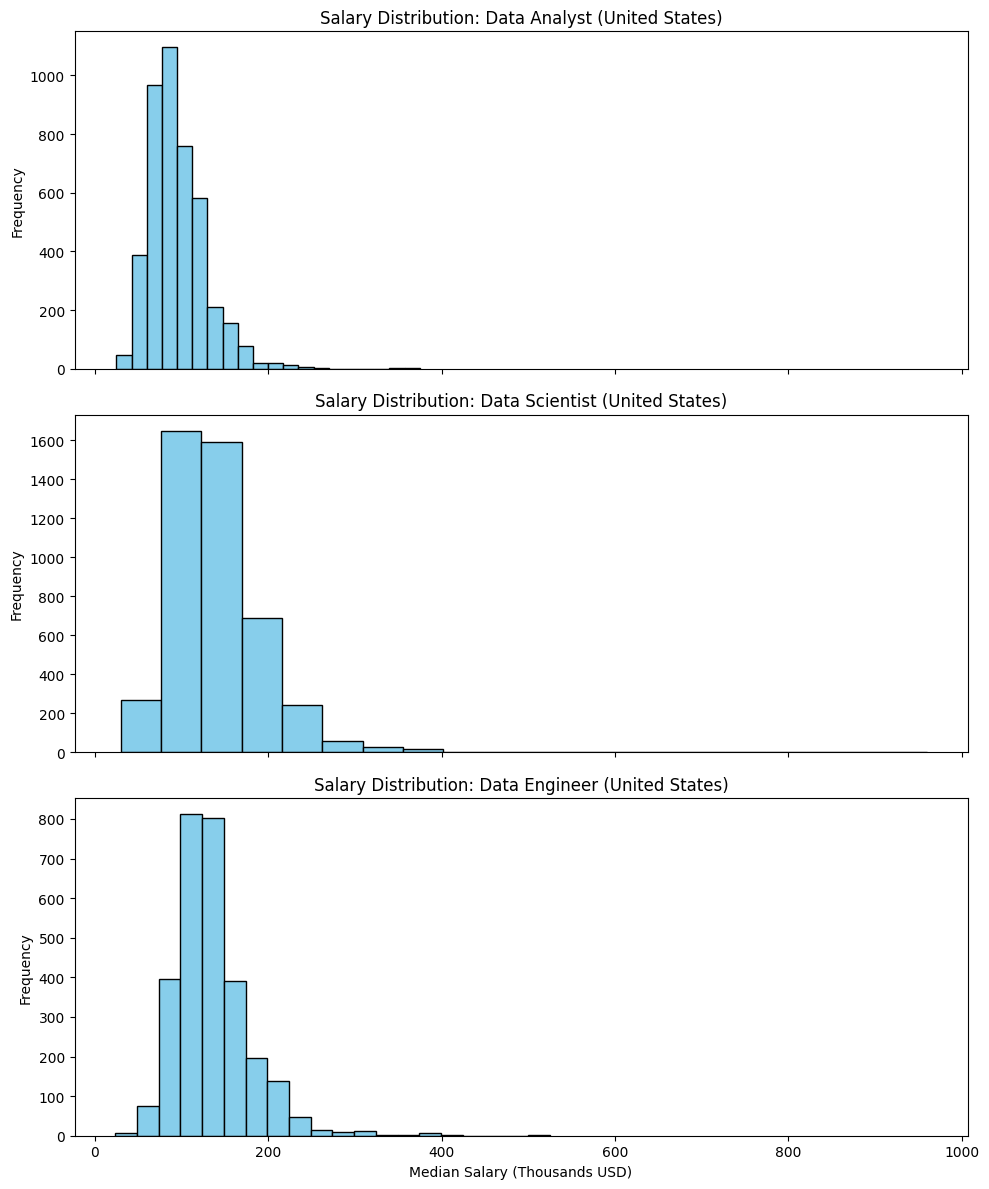

In [8]:
import matplotlib.pyplot as plt

# Filter for United States and relevant job titles, drop NaN salaries
us_df = df[
    (df['job_country'].str.lower() == 'united states') &
    (df['job_title_short'].str.lower().isin(['data analyst', 'data scientist', 'data engineer'])) &
    (df['salary_year_avg'].notna())
]

# Prepare data for each job title
titles = ['data analyst', 'data scientist', 'data engineer']
salary_data = [us_df[us_df['job_title_short'].str.lower() == title]['salary_year_avg'] for title in titles]

# Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i, ax in enumerate(axs):
    # Convert salaries to thousands for plotting
    salaries_in_thousands = salary_data[i] / 1000
    ax.hist(salaries_in_thousands, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Salary Distribution: {titles[i].title()} (United States)')
    ax.set_ylabel('Frequency')
    if i == 2:
        ax.set_xlabel('Median Salary (Thousands USD)')

plt.tight_layout()
plt.show()

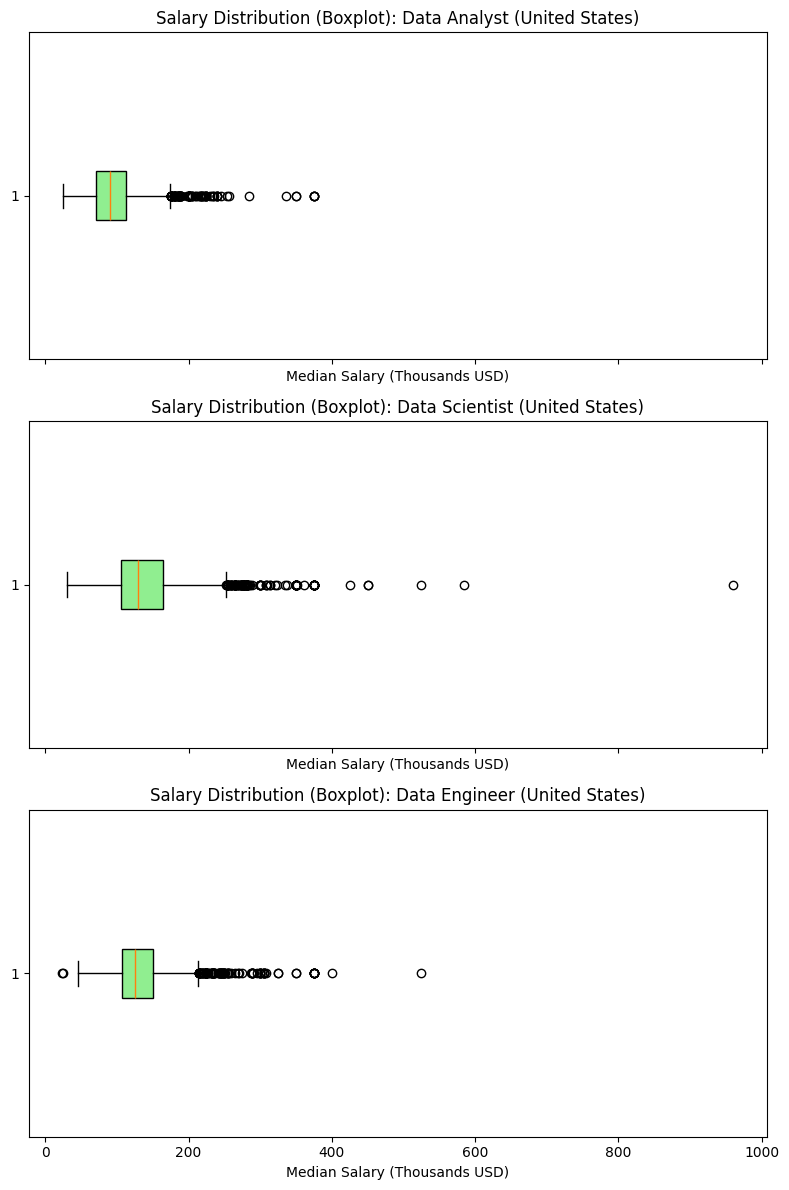

In [9]:
import matplotlib.pyplot as plt

# Filter for United States and relevant job titles, drop NaN salaries
us_df = df[
    (df['job_country'].str.lower() == 'united states') &
    (df['job_title_short'].str.lower().isin(['data analyst', 'data scientist', 'data engineer'])) &
    (df['salary_year_avg'].notna())
]

# Prepare data for each job title (in thousands)
titles = ['data analyst', 'data scientist', 'data engineer']
salary_data = [us_df[us_df['job_title_short'].str.lower() == title]['salary_year_avg'] / 1000 for title in titles]

# Create subplots: 3 rows, 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for i, ax in enumerate(axs):
    ax.boxplot(salary_data[i], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    ax.set_title(f'Salary Distribution (Boxplot): {titles[i].title()} (United States)')
    ax.set_xlabel('Median Salary (Thousands USD)')

plt.tight_layout()
plt.show()

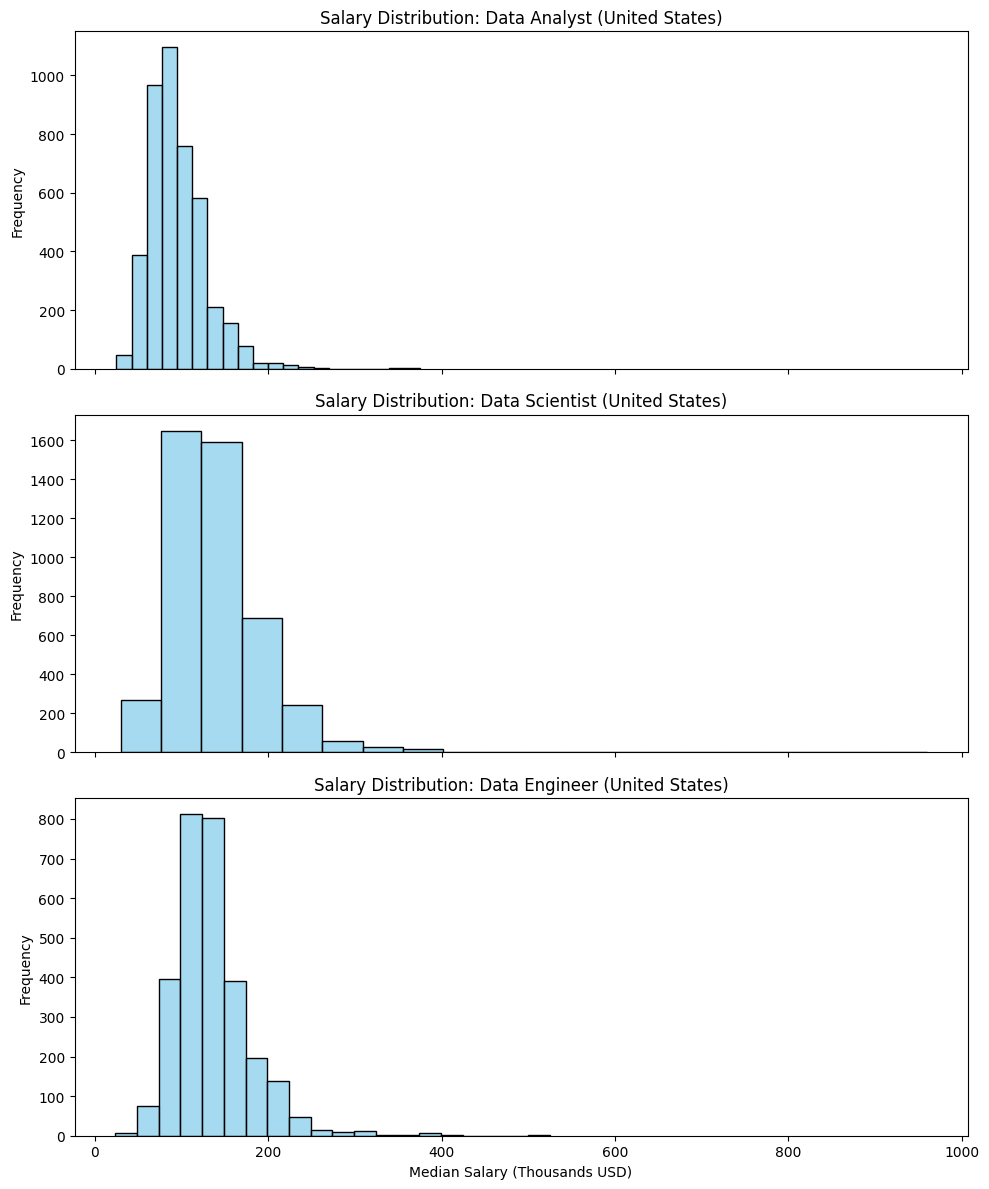

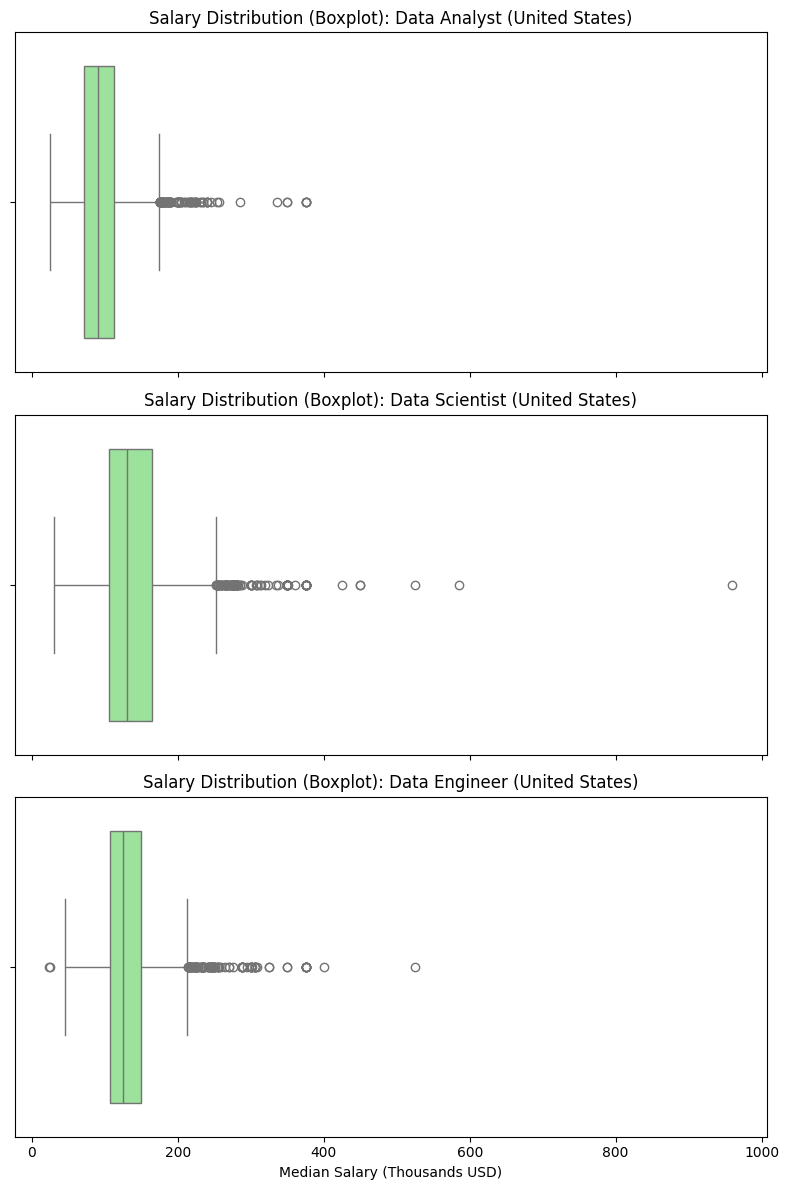

In [3]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for United States and relevant job titles, drop NaN salaries
us_df = df[
    (df['job_country'].str.lower() == 'united states') &
    (df['job_title_short'].str.lower().isin(['data analyst', 'data scientist', 'data engineer'])) &
    (df['salary_year_avg'].notna())
].copy()

# Convert salaries to thousands for plotting
us_df['salary_thousands'] = us_df['salary_year_avg'] / 1000

# Set the order for job titles
order = ['data analyst', 'data scientist', 'data engineer']

# --- Histograms using seaborn and subplots ---
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
for i, title in enumerate(order):
    sns.histplot(
        data=us_df[us_df['job_title_short'].str.lower() == title],
        x='salary_thousands',
        bins=20,
        ax=axs[i],
        color='skyblue',
        edgecolor='black'
    )
    axs[i].set_title(f'Salary Distribution: {title.title()} (United States)')
    axs[i].set_ylabel('Frequency')
    if i == 2:
        axs[i].set_xlabel('Median Salary (Thousands USD)')
plt.tight_layout()
plt.show()

# --- Boxplots using seaborn and subplots ---
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
for i, title in enumerate(order):
    sns.boxplot(
        data=us_df[us_df['job_title_short'].str.lower() == title],
        x='salary_thousands',
        ax=axs[i],
        color='lightgreen'
    )
    axs[i].set_title(f'Salary Distribution (Boxplot): {title.title()} (United States)')
    axs[i].set_xlabel('Median Salary (Thousands USD)')
plt.tight_layout()
plt.show()